<a href="https://colab.research.google.com/github/leman-cap13/kaggle_datasets_/blob/main/CNN__food_binaryipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2025-04-03 06:24:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170.207, 74.125.68.207, 142.251.175.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.170.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.0MB/s    in 5.6s    

2025-04-03 06:24:30 (18.5 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



unzip formasi 1

In [ ]:
# zip_ref=zipfile.ZipFile('/content/pizza_steak.zip','r')
# zip_ref.extractall()
# zip_ref.close()

unzip formasi 2

In [ ]:
with zipfile.ZipFile('/content/pizza_steak.zip','r') as zip_ref:
  zip_ref.extractall()

In [ ]:
!ls /content/pizza_steak

test  train


In [ ]:
import os

for dirpath,dirnames,filenames in os.walk('/content/pizza_steak'):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 2 directories and 0 images in '/content/pizza_steak'.
there are 2 directories and 0 images in '/content/pizza_steak/train'.
there are 0 directories and 750 images in '/content/pizza_steak/train/pizza'.
there are 0 directories and 750 images in '/content/pizza_steak/train/steak'.
there are 2 directories and 0 images in '/content/pizza_steak/test'.
there are 0 directories and 250 images in '/content/pizza_steak/test/pizza'.
there are 0 directories and 250 images in '/content/pizza_steak/test/steak'.


In [ ]:
num_steak_images_train=len(os.listdir('/content/pizza_steak/train/steak'))
num_steak_images_train

750

Image shape: (512, 512, 3)


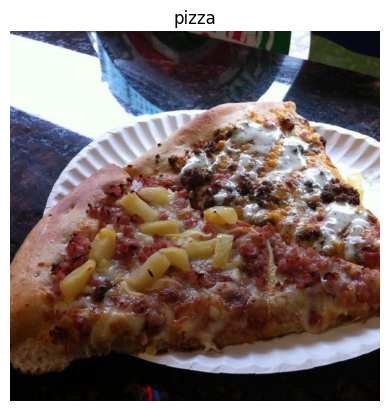

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  path=target_dir+target_class
  img_paths=os.listdir(path)
  img_path=path+ '/' + random.choice(img_paths)
  img=mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')
  print(f"Image shape: {img.shape}")

view_random_image(target_dir='/content/pizza_steak/train/', target_class='pizza')

In [ ]:
# import pathlip

In [ ]:
import tensorflow as tf
IMG_SIZE=(224,224)
train_dir='/content/pizza_steak/train/'
test_dir='/content/pizza_steak/test/'

train_data=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                               image_size=IMG_SIZE,
                                                               label_mode='binary',
                                                               batch_size=32,
                                                               shuffle=True,
                                                               crop_to_aspect_ratio=True
                                                               )

test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                              image_size=IMG_SIZE,
                                                              label_mode='binary',
                                                              crop_to_aspect_ratio=True)

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=[224,224,3]),
    tf.keras.layers.Rescaling(1/255.),

    tf.keras.layers.Conv2D(filters=64,kernel_size=7,padding='same', activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same', activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same', activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same', activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same', activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(units=128,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(rate=0.5),

    tf.keras.layers.Dense(units=64,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(rate=0.5),

    tf.keras.layers.Dense(units=1,activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9),
              metrics=['accuracy'])

model.fit(train_data,validation_data=test_data,epochs=5)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 330ms/step - accuracy: 0.5543 - loss: 0.8664 - val_accuracy: 0.7360 - val_loss: 0.6565
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 247ms/step - accuracy: 0.5813 - loss: 0.6649 - val_accuracy: 0.7380 - val_loss: 0.5802
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 238ms/step - accuracy: 0.6547 - loss: 0.6073 - val_accuracy: 0.7600 - val_loss: 0.5345
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 269ms/step - accuracy: 0.6956 - loss: 0.5842 - val_accuracy: 0.8040 - val_loss: 0.5076
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 239ms/step - accuracy: 0.7330 - loss: 0.5519 - val_accuracy: 0.7600 - val_loss: 0.4917


In [ ]:
model.evaluate(train_data)

47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 228ms/step - accuracy: 0.7661 - loss: 0.4928


[0.49463117122650146, 0.7553333044052124]

In [ ]:
model.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.7602 - loss: 0.4910


[0.49171847105026245, 0.7599999904632568]

In [ ]:
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2)
])

In [ ]:
class_names=train_data.class_names

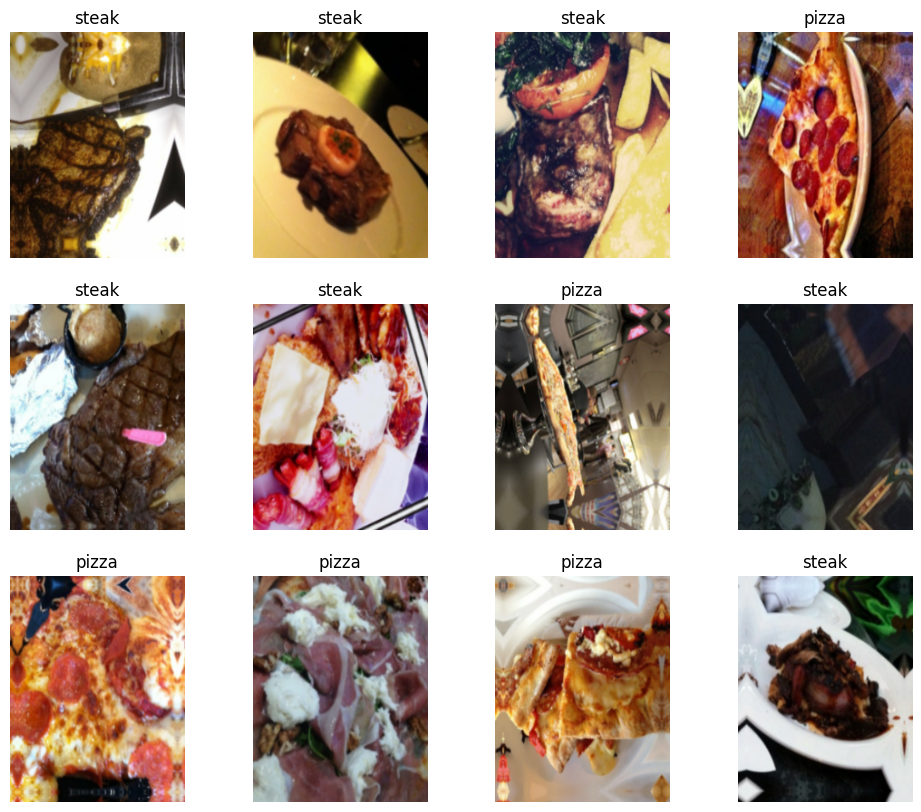

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
for images,label in train_data.take(1):
  image_augmented=data_augmentation(images)
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_augmented[i].numpy().astype('uint8'))
    plt.title(class_names[label[i].numpy().astype('int8')[0]])
    plt.axis('off')


In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=[224,224,3]),
    data_augmentation,
    tf.keras.layers.Rescaling(1/255.),
    tf.keras.layers.Resizing(224,224),

    tf.keras.layers.Conv2D(filters=64,kernel_size=7,padding='same', activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same', activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same', activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same', activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same', activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(units=128,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(rate=0.5),

    tf.keras.layers.Dense(units=64,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(rate=0.5),

    tf.keras.layers.Dense(units=1,activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.0003,momentum=0.9),
              metrics=['accuracy'])

model.fit(train_data,validation_data=test_data,epochs=5)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 236ms/step - accuracy: 0.6588 - loss: 0.6207 - val_accuracy: 0.7240 - val_loss: 0.5592
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 242ms/step - accuracy: 0.6530 - loss: 0.6096 - val_accuracy: 0.7840 - val_loss: 0.5411
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 242ms/step - accuracy: 0.6592 - loss: 0.5925 - val_accuracy: 0.7680 - val_loss: 0.5154
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 236ms/step - accuracy: 0.6709 - loss: 0.5715 - val_accuracy: 0.7820 - val_loss: 0.5089
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 237ms/step - accuracy: 0.6599 - loss: 0.5977 - val_accuracy: 0.7980 - val_loss: 0.4919


In [ ]:
base_model=tf.keras.applications.ResNet50(include_top=False)

avg=tf.keras.layers.GlobalAveragePooling2D()(base_model.output)

output=tf.keras.layers.Dense(units=1,activation='sigmoid')(avg)

model=tf.keras.Model(inputs=base_model.inputs, outputs=output)

In [ ]:
base_model.trainable=False

In [ ]:
initial_learning_rate=0.01
lr_schedule=tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=47,
    decay_rate=0.96
)

early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                patience=3,
                                                restore_best_weights=True)

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule,momentum=0.9),
              metrics=['accuracy'])

model.fit(train_data, epochs=15, validation_data=test_data,callbacks=early_stopping)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_605']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


47/47 ━━━━━━━━━━━━━━━━━━━━ 35s 467ms/step - accuracy: 0.8449 - loss: 0.3331 - val_accuracy: 0.9660 - val_loss: 0.0740
Epoch 2/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - accuracy: 0.9575 - loss: 0.1100 - val_accuracy: 0.9840 - val_loss: 0.0500
Epoch 3/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - accuracy: 0.9736 - loss: 0.0613 - val_accuracy: 0.9780 - val_loss: 0.0578
Epoch 4/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.9719 - loss: 0.0621 - val_accuracy: 0.9820 - val_loss: 0.0517
Epoch 5/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 139ms/step - accuracy: 0.9903 - loss: 0.0333 - val_accuracy: 0.9740 - val_loss: 0.0626


In [ ]:
inputs=tf.keras.Input(shape=(224,224,3))

x=data_augmentation(inputs)
x=tf.keras.applications.resnet50.preprocess_input(x)

base_model=tf.keras.applications.ResNet50(include_top=False,input_tensor=x)

avg=tf.keras.layers.GlobalAveragePooling2D()(base_model.output)

output=tf.keras.layers.Dense(units=1,activation='sigmoid')(avg)
model=tf.keras.Model(inputs,outputs=output)


In [ ]:
base_model.trainable=False

initial_learning_rate=0.01
lr_schedule=tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=47,
    decay_rate=0.96
)

early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                patience=3,
                                                restore_best_weights=True)

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule,momentum=0.9),
              metrics=['accuracy'])

model.fit(train_data, epochs=15, validation_data=test_data,callbacks=early_stopping)

Epoch 1/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 55s 991ms/step - accuracy: 0.8111 - loss: 0.3420 - val_accuracy: 0.9920 - val_loss: 0.0338
Epoch 2/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 36s 743ms/step - accuracy: 0.9663 - loss: 0.0916 - val_accuracy: 0.9900 - val_loss: 0.0421
Epoch 3/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 29s 624ms/step - accuracy: 0.9797 - loss: 0.0650 - val_accuracy: 0.9920 - val_loss: 0.0400
Epoch 4/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 584ms/step - accuracy: 0.9775 - loss: 0.0613 - val_accuracy: 0.9900 - val_loss: 0.0375
